In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation

In [63]:
with open('../train_1.csv','r') as f:
    f.readline()
    X = np.array([list(map(float, line.strip().split(',')[1:])) for line in f])

In [64]:
Y = np.array(X[:,-1:], dtype=np.int32).reshape(-1)
X = X[:,:-1]

In [65]:
from sklearn.utils import shuffle

In [66]:
X, Y = shuffle(X, Y)

In [67]:
X = X[:7200]
Y = Y[:7200]

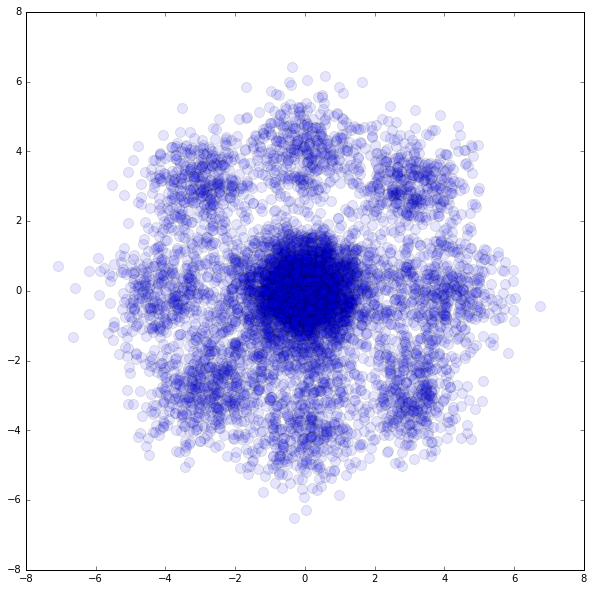

In [153]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], s=100, alpha=0.1)#, cmap='coolwarm')
plt.show()

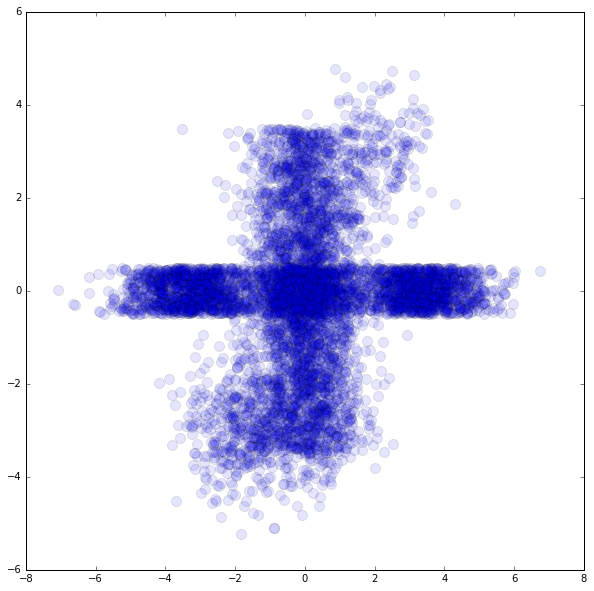

In [154]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,2], s=100, alpha=0.1, cmap='coolwarm')
plt.show()

In [70]:
cls = KMeans(n_clusters=12, max_iter=300)
X = X[:,:3]

In [71]:
xy = cls.fit_predict(X) 

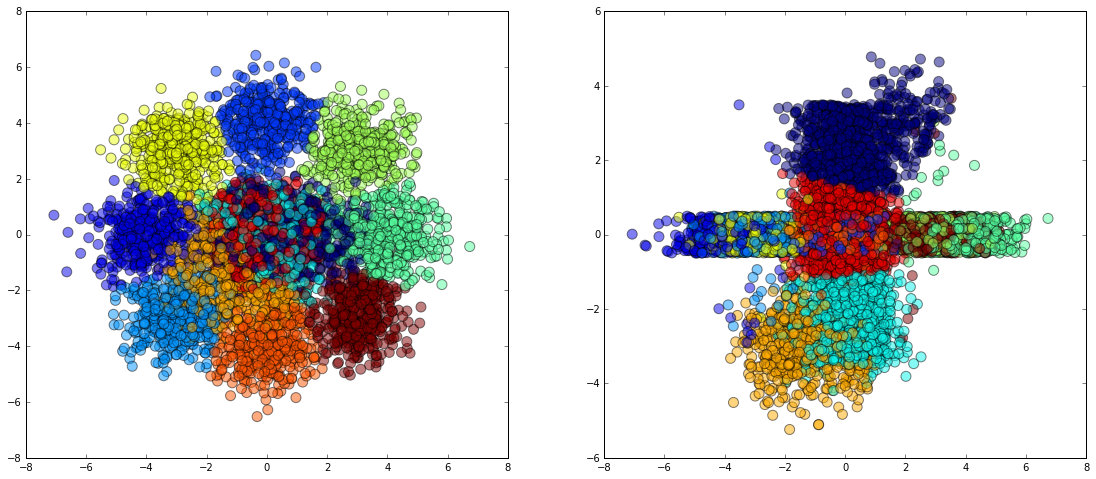

In [78]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(19,8))
ax2.scatter(X[:,0], X[:,2], c=xy, s=100, alpha=0.5)#, cmap='coolwarm')
ax1.scatter(X[:,0], X[:,1], c=xy, s=100, alpha=0.5)#, cmap='coolwarm')
plt.show()

In [79]:
set(xy)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [108]:
cls_ap = AffinityPropagation(damping=0.9, max_iter=200, convergence_iter=15, verbose=1)

In [109]:
xy_ap = cls_ap.fit_predict(X)

Converged after 164 iterations.


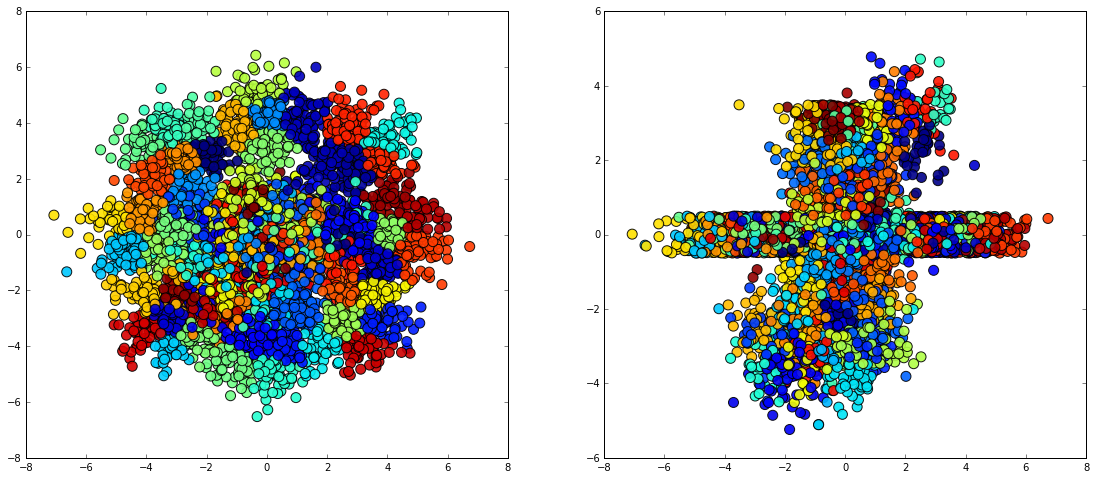

In [110]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(19,8))
ax2.scatter(X[:,0], X[:,2], c=xy_ap, s=100, alpha=0.9)#, cmap='coolwarm')
ax1.scatter(X[:,0], X[:,1], c=xy_ap, s=100, alpha=0.9)#, cmap='coolwarm')
plt.show()

In [156]:
xy_ap[:10]

array([103,   8,  32,   7,  63,  70,  54,  37,  88,  91])

In [113]:
from sklearn.preprocessing import OneHotEncoder

In [142]:
encoder_kmeans = OneHotEncoder()

In [145]:
cluster_feautres_kmeans = encoder_kmeans.fit_transform(xy.reshape(-1,1))

In [146]:
cluster_feautres_kmeans

<7200x12 sparse matrix of type '<class 'numpy.float64'>'
	with 7200 stored elements in Compressed Sparse Row format>

In [144]:
cluster_feautres[:8].toarray()

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

In [147]:
encoder_ap  = OneHotEncoder()
cluster_feautres_ap = encoder_ap.fit_transform(xy_ap.reshape(-1,1))

In [141]:
import scipy
import numpy as np

In [149]:
new_features = scipy.sparse.hstack([cluster_feautres_kmeans, cluster_feautres_ap])

In [150]:
new_features

<7200x116 sparse matrix of type '<class 'numpy.float64'>'
	with 14400 stored elements in COOrdinate format>

In [151]:
# _X_s_target = X_s_target.tocsr()[:,_rf_fi.argsort()[-offset:]]